<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lab)

***



Week 2 | Lesson 4.1

## Group Exercize (~80mins-ish)

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!

ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')

### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [4]:
# Solution here - A LOT
ufo.head(2)
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.1+ MB


### 2. What is the breakdown of dtypes in our dataframe?

In [6]:
# Solution here
ufo['Shape Reported'].unique()
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

In [ ]:
## Change this cell to a "markdown" type cell

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

In [8]:
ufo['Colors Reported'].value_counts()

ORANGE                          5216
RED                             4809
GREEN                           1897
BLUE                            1855
YELLOW                           842
RED ORANGE                       486
RED GREEN                        469
RED BLUE                         445
RED GREEN BLUE                   166
GREEN BLUE                       147
RED YELLOW                       146
ORANGE YELLOW                    137
ORANGE GREEN                      66
ORANGE BLUE                       58
YELLOW GREEN                      53
RED YELLOW BLUE                   36
RED YELLOW GREEN                  35
RED ORANGE YELLOW                 32
YELLOW BLUE                       27
RED YELLOW GREEN BLUE             26
RED ORANGE BLUE                   21
YELLOW GREEN BLUE                 13
ORANGE GREEN BLUE                 13
RED ORANGE GREEN                  12
RED ORANGE GREEN BLUE              8
ORANGE YELLOW GREEN                5
RED ORANGE YELLOW GREEN            4
O

### 4. Which shapes are most commonly reported?

In [10]:
ufo['Shape Reported'].value_counts()

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape Reported, dtype: int64

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [37]:
ufo.groupby(['Colors Reported', 'Shape Reported'])[['State']].count().reset_index().sort_values(['Colors Reported','State'],ascending=False).rename(columns={'State':'Count'})

,Colors Reported,Shape Reported,Count
380,YELLOW GREEN BLUE,OVAL,3
378,YELLOW GREEN BLUE,LIGHT,2
379,YELLOW GREEN BLUE,OTHER,2
376,YELLOW GREEN BLUE,CYLINDER,1
377,YELLOW GREEN BLUE,DIAMOND,1
381,YELLOW GREEN BLUE,TRIANGLE,1
366,YELLOW GREEN,FIREBALL,15
363,YELLOW GREEN,CIRCLE,4
369,YELLOW GREEN,OTHER,4
368,YELLOW GREEN,LIGHT,3


### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [38]:
ufo[ufo['Shape Reported']=='CIGAR']

,City,Colors Reported,Shape Reported,State,Time
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
25,San Diego,NaN,CIGAR,CA,1/1/1944 12:00
32,Ft. Lee,NaN,CIGAR,VA,1/1/1945 12:00
74,Syracuse,NaN,CIGAR,NY,7/14/1947 10:30
88,Proctor,NaN,CIGAR,OK,8/15/1947 20:15
89,Whitmore Lake,NaN,CIGAR,MI,12/24/1947 21:00
105,Salem,NaN,CIGAR,OR,6/30/1949 21:00
117,Baltimore,NaN,CIGAR,MD,10/15/1949 20:00
138,Coeur d'Alene,ORANGE,CIGAR,ID,7/2/1950 13:00
149,Palm Springs,NaN,CIGAR,CA,1/20/1951 4:30


### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

In [43]:
def silly_filter(series):
    x = series
    if x == "VARIOUS":
        print x
        

ufo['Shape Reported'].map(silly_filter)

VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS
VARIOUS


0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
80513    None
80514    None
80515    None
80516    None
80517    None
80518    None
80519    None
80520    None
80521    None
80522    None
80523    None
80524    None
80525    None
80526    None
80527    None
80528    None
80529    None
80530    None
80531    None
80532    None
80533    None
80534    None
80535    None
80536    None
80537    None
80538    None
80539    None
80540    None
80541    None
80542    None
Name: Shape Reported, dtype: object

### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

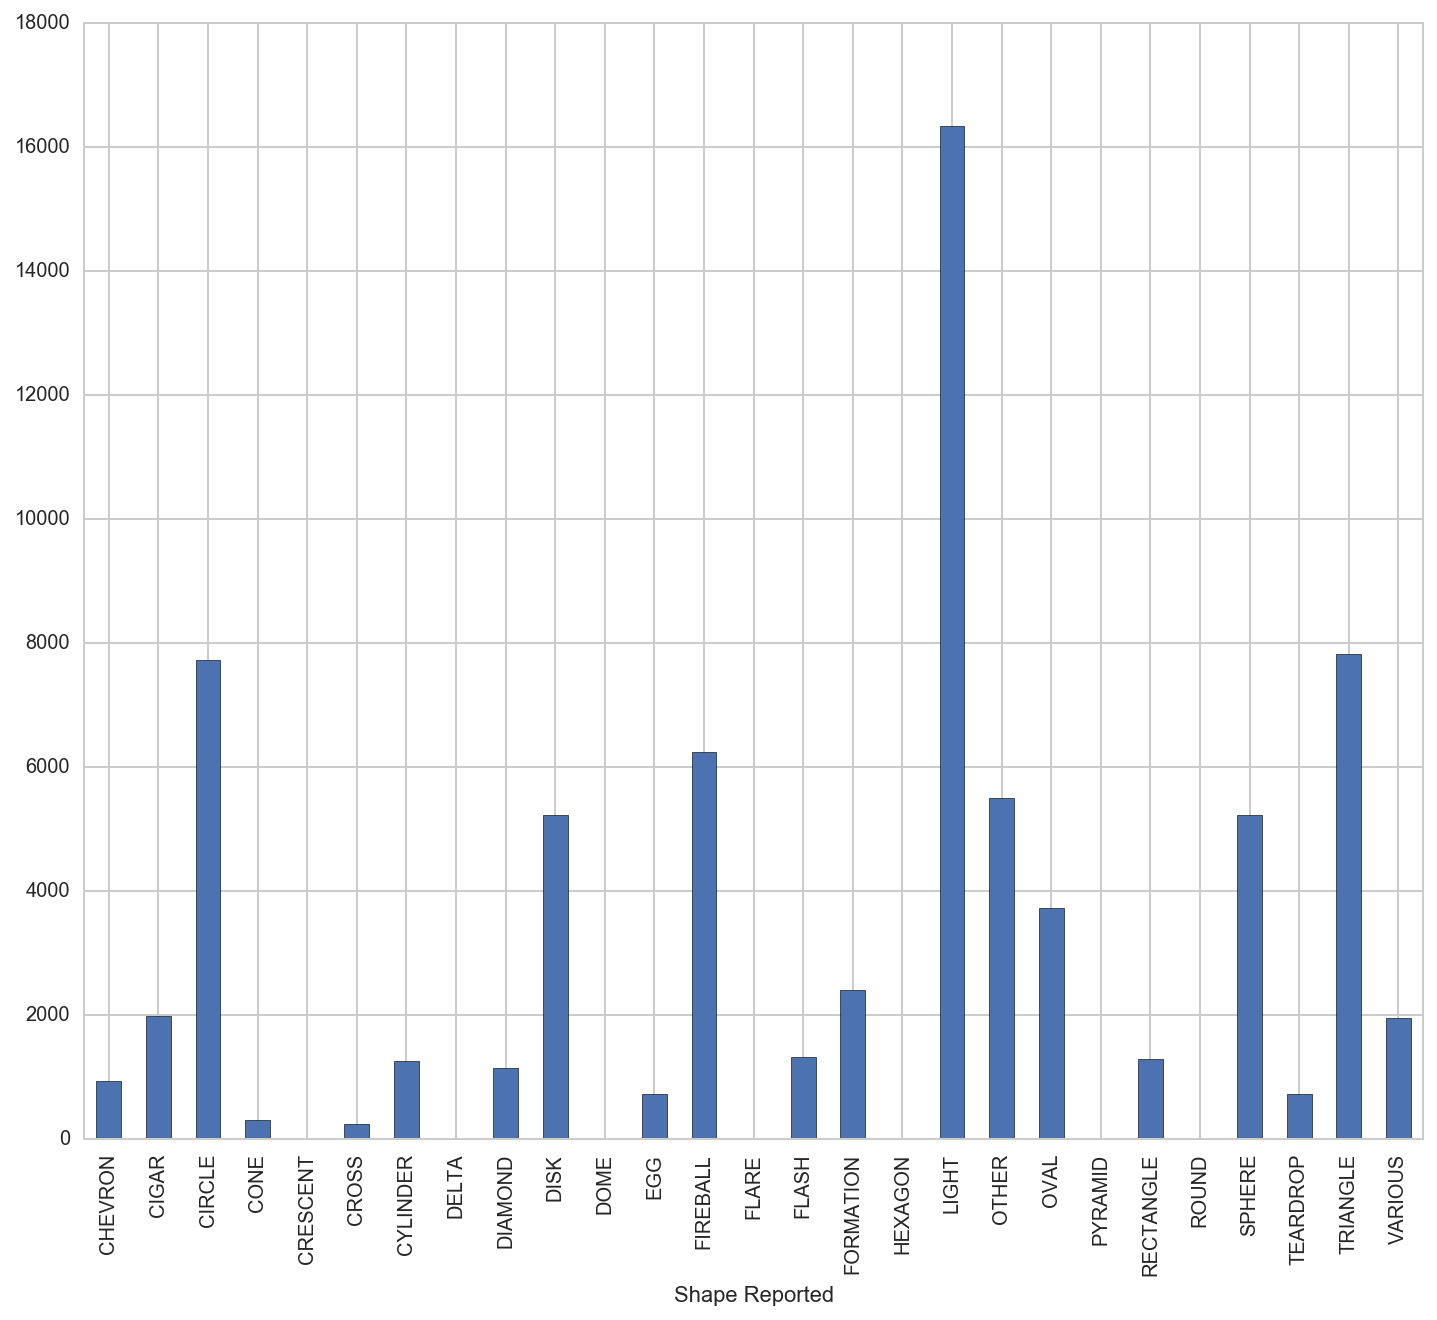

In [63]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ufo.groupby(['Shape Reported']).size().plot(kind='bar', ax=ax)
plt.show()

### 9. Plot counts of sightings per City

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

### 13.  Bonus:  What are the top 20 shapes by City + State?


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art